In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

df = pd.read_csv('./data/titanic_clean.csv')
print(df.sample(5))

In [26]:
print(df['Fare'].value_counts())


Fare
-0.537123    43
-0.108212    42
-0.743938    38
-1.092646    34
 0.388840    31
             ..
 0.763820     1
 0.578158     1
-2.058102     1
-0.025051     1
-0.235599     1
Name: count, Length: 248, dtype: int64


In [38]:
label_sex = LabelEncoder()
label_embarked = LabelEncoder()

# Fit and transform on training data
df['Sex'] = label_sex.fit_transform(df['Sex'])
df['Embarked'] = label_embarked.fit_transform(df['Embarked'])

In [33]:
qun_tra_age = QuantileTransformer(output_distribution = 'normal', n_quantiles=500)
qun_tra_fare = QuantileTransformer(output_distribution = 'normal', n_quantiles=500)

df['Age'] = qun_tra_age.fit_transform(df[['Age']])
df['Fare'] = qun_tra_fare.fit_transform(df[['Fare']])

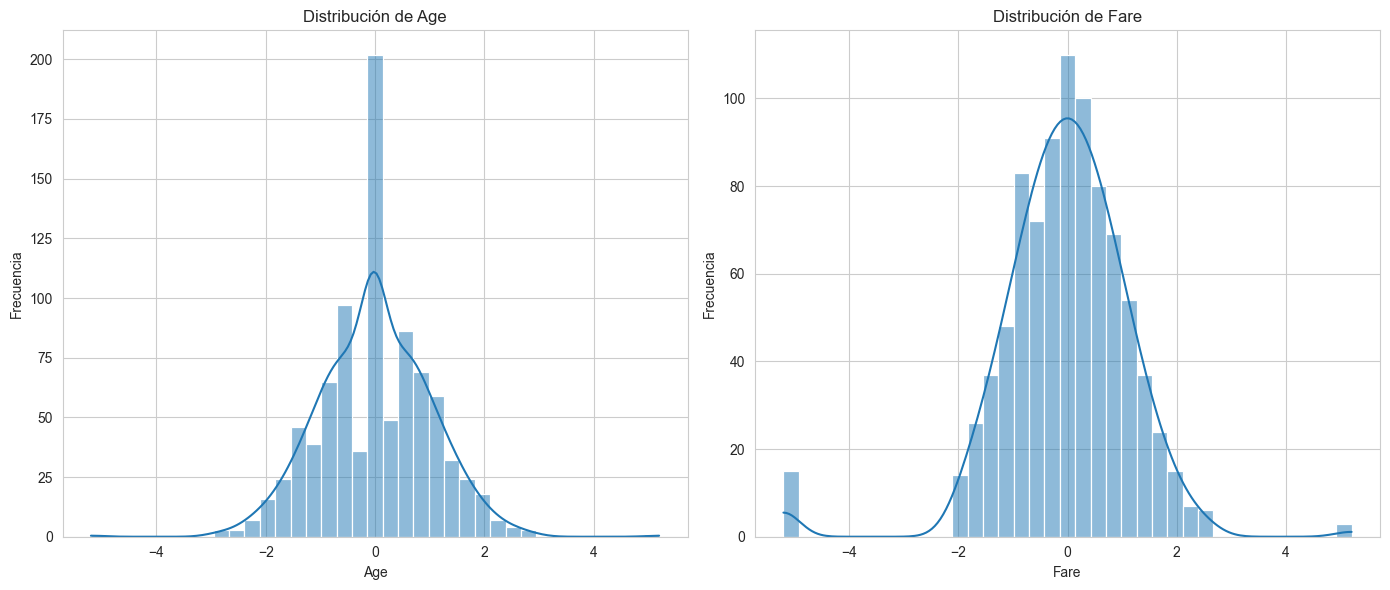

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['Age'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribución de Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frecuencia')

# Gráfica de la distribución de Fare
sns.histplot(df['Fare'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribución de Fare')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frecuencia')

# Mostrar las gráficas
plt.tight_layout()
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 55.8+ KB


In [39]:
mms_pclass= MinMaxScaler()
mms_sex = MinMaxScaler()
mms_age = MinMaxScaler()
mms_sibsp = MinMaxScaler()
mms_parch = MinMaxScaler()
mms_fare = MinMaxScaler()
mms_embarked = MinMaxScaler()

# Ejecutar transformaciones
df['Pclass'] = mms_pclass.fit_transform(df[['Pclass']])
df['Sex'] = mms_sex.fit_transform(df[['Sex']])
df['Age'] = mms_age.fit_transform(df[['Age']])
df['SibSp'] = mms_sibsp.fit_transform(df[['SibSp']])
df['Parch'] = mms_parch.fit_transform(df[['Parch']])
df['Fare'] = mms_fare.fit_transform(df[['Fare']])
df['Embarked'] = mms_embarked.fit_transform(df[['Embarked']])

In [40]:
print(df.sample(5))

     Survived  Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
215         1     0.0  0.0  0.542129  0.125  0.000000  0.659982       0.0
539         1     0.0  0.0  0.433152  0.000  0.333333  0.587161       0.0
417         1     0.5  0.0  0.396662  0.000  0.333333  0.489594       1.0
538         0     1.0  1.0  0.497826  0.000  0.000000  0.502174       1.0
282         0     1.0  1.0  0.377957  0.000  0.000000  0.466485       1.0


In [41]:
import os

# 1. Definimos el nombre de la carpeta y el archivo
carpeta = "data"
nombre_archivo = "titanic_procesado.csv"
ruta_completa = os.path.join(carpeta, nombre_archivo)

# 2. Verificamos si la carpeta existe, si no, la creamos para evitar errores
if not os.path.exists(carpeta):
    os.makedirs(carpeta)
    print(f"Carpeta '{carpeta}' creada.")

# 3. Guardamos el archivo en esa ruta
df.to_csv(ruta_completa, index=False)

print(f"¡Archivo guardado con éxito en: {ruta_completa}!")

¡Archivo guardado con éxito en: data/titanic_procesado.csv!
